In [1]:
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
import ji_ji_primeIMRIPY


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.


# Merger Rate calculations for IMRIPY systems assuming that the DM halos are intact in the merging process.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t = 13.78e9               #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
ρ_m  = 4e19                #ρ_m=4e19 M☉ Gpc^-3
t_m = 13.78e9             #in units of yr 
σ_eq = 0.005



def P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f, DM_halos_presence):
    
    if m_1 < m_min or m_2 < m_min:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else:
        def f_(m):
            return f * P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))

        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
         
        
        
        if DM_halos_presence == 'False':
            
            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0965*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0165*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


            def j_i(m_1,m_2,Δ_1,Δ_2, X):
                return (((85/3) * (G**3) * m_1 * m_2 * (m_1 + m_2) * t_m)/((a_initial(m_1, m_2, Δ_1, Δ_2, X)**4)* (c**5)))**(1/7)
            
            
            def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                return (j_i(m_1,m_2,Δ_1,Δ_2, X) / (7 * t_m))
            
                
            j_initial = j_i(m_1,m_2,Δ_1,Δ_2, X) 
            j_initial_prime = j_i_prime(m_1,m_2,Δ_1,Δ_2, X)
        
            # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            def D(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4108 * np.sqrt(f**2 + 1.1994 * (σ_eq**2)) * D(m_1, m_2, Δ_1, Δ_2, X) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):    
                 return j_initial/ j_X(m_1, m_2, Δ_1, Δ_2, X)

            return j_initial_prime * (1/j_initial) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            
            
        
        else:
            
            beta = 0.75
            gamma  =  0.65
            delta = -0.89
            m1_ref = 1      # in units of solar mass.
            m2_ref = 1e-3   # in units of solar mass.

            m = file['arr_0']
            b = file['arr_1']
            a_i_ref = file['arr_2']  # in units of pc
            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


            def C(m_1,m_2,Δ_1,Δ_2, X):
                return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))

            C_list = (C(m_1,m_2,Δ_1,Δ_2, X)).tolist()
            j_initial_list = np.zeros(len(C_list))
            j_initial_prime_list  = np.zeros(len(C_list))
            
            
            for i, C in enumerate(C_list):
                variable = t_m/C
                
                if variable < tm_ref_list[0]:
                    
                    j_i = ji_ji_primeIMRIPY.ji_into_C_fitting_function(m, b, t_m) / (C**(1/m))   # t_m = (j_i**m) * (10**b)
                    j_i_prime = ji_ji_primeIMRIPY.ji_into_C_prime_fitting_function(m, b, t_m) / (C**(1/m)) 
                  
                elif tm_ref_list[0] < variable < tm_ref_list[-1]:
                    x = tm_ref_list
                    y = ji_ref_list
                    j_i = ji_ji_primeIMRIPY.ji_interpolation(x, y, variable)
                    j_i_prime = ji_ji_primeIMRIPY.ji_prime_into_C_interpolation(x, y, variable) / C
                
                else: 
                    
                    
                    j_i =   1e-3                            #np.max(ji_ref_list)
                    j_i_prime =   0                      #np.max(tm_ref_list)
                
                
                j_initial_list[i]       =  j_i
                j_initial_prime_list[i] =  j_i_prime
                
            
            j_initial = np.array(j_initial_list) 
            j_initial_prime = np.array(j_initial_prime_list)
            
            
            
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
 
            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))
   
            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))

                # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            def D_halo(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X_halo(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4087 * np.sqrt(f**2 + 0.2998 * (σ_eq**2)) * D_halo(m_1, m_2, Δ_1, Δ_2, X) * np.sqrt((m_1 + m_2)/ M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):    
                return j_initial/ j_X_halo(m_1, m_2, Δ_1, Δ_2, X)

            
            
            return j_initial_prime * (1/j_initial) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            


In [2]:
m_1 = 7   #in units of M☉
m_2 = 9    #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


In [3]:
# Choosing the range of PBH mass function from m_min = 5 M☉ - 100 M☉.

m_1 = m_1_list[-1]            # in units of M☉

Δ_1 = Δ_1_list[-1]      

m_2 = m_2_list[0]             # in units of M☉
 
Δ_2 = Δ_2_list[0]  


m_min = 5     #in units of M☉
m_max = 100   #in units of M☉

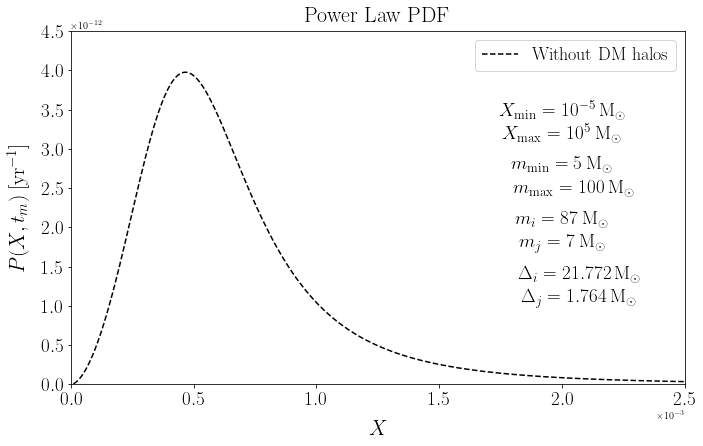

In [4]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.

X_min = 1e-5
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 5 - 100 solar mass.


plt.figure(figsize = (11, 6.5))
file = np.load('tm_ofj0_PWRhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


f_pbh_nohalo_PWR_1 = 1.14e-3
f_nohalo_PWR_1 = 0.85 * f_pbh_nohalo_PWR_1
      
       
        
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_1 , DM_halos_presence = 'False'), 'k--' )


plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))



plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlim(0, 2.5e-3)
plt.ylim(0, 4.5e-12)




plt.text(2e-3, 3.5e-12, "$X_\mathrm{min} = 10^{-5} \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(2e-3, 3.2e-12, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(2e-3, 2.8e-12, "$m_\mathrm{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")
plt.text(2.05e-3, 2.5e-12, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(2e-3, 2.1e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(2e-3, 1.8e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.07e-3, 1.4e-12, "$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(2.07e-3, 1.1e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")




plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos"], prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('1imPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

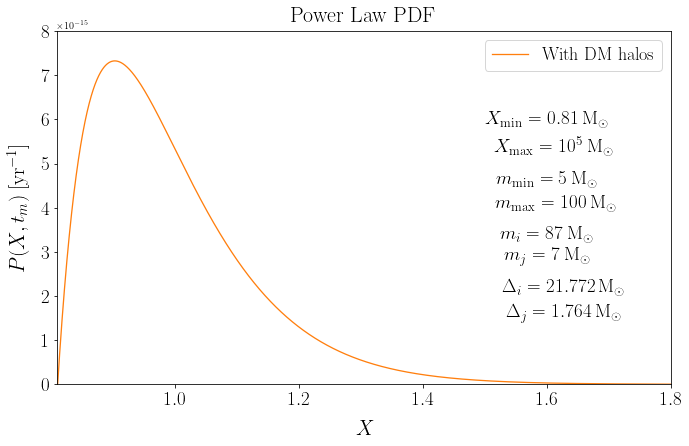

In [5]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.

X_min = 0.81
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 5 - 100 solar mass.



plt.figure(figsize = (11, 6.5))
file = np.load('tm_ofj0_PWRhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


f_pbh_halo_PWR_1 = 7.94e-4
f_halo_PWR_1 = 0.85 * f_pbh_halo_PWR_1              
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_PWR_1 , DM_halos_presence = 'True'), 'C1' )


#plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))

plt.text(1.6, 6e-15, "$X_\mathrm{min} = 0.81 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(1.61, 5.4e-15, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(1.6, 4.65e-15, "$m_\mathrm{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")
plt.text(1.615, 4.1e-15, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(1.6, 3.4e-15, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(1.6, 2.9e-15, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(1.627, 2.2e-15, "$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(1.627, 1.6e-15, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")




plt.xlim(0.81, 1.8)
plt.ylim(0, 8e-15)

plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos"], prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('1himPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

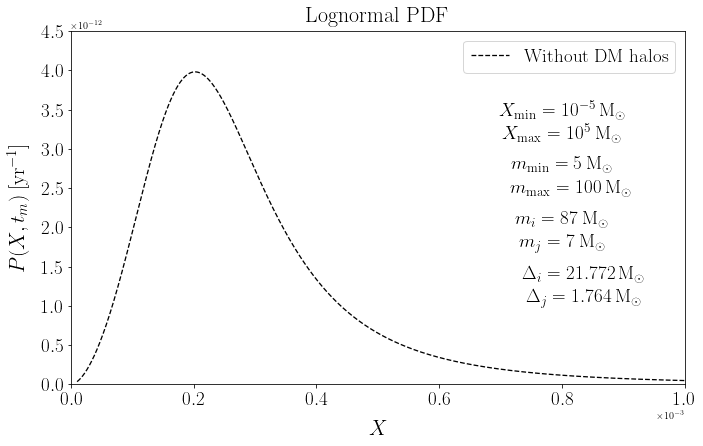

In [6]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.

X_min = 1e-5
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 5 - 100 solar mass.




plt.figure(figsize = (11, 6.5))
file = np.load('tm_ofj0_Lgnmlhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


f_pbh_nohalo_Lognormal = 8.26e-4
f_nohalo_Lognormal  = 0.85 * f_pbh_nohalo_Lognormal 


def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))




plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_Lognormal,  DM_halos_presence = 'False'), 'k--' )

plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))


plt.text(0.8e-3, 3.5e-12, "$X_\mathrm{min} = 10^{-5} \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.8e-3, 3.2e-12, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(0.8e-3, 2.8e-12, "$m_\mathrm{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")
plt.text(0.815e-3, 2.5e-12, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(0.8e-3, 2.1e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.8e-3, 1.8e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.835e-3, 1.4e-12, "$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.835e-3, 1.1e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")



plt.xlim(0, 1e-3)
plt.ylim(0, 4.5e-12)

    
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos"], prop = {'size':19}, facecolor = 'white', fontsize=130, loc='upper right')
plt.title('Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('1imLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

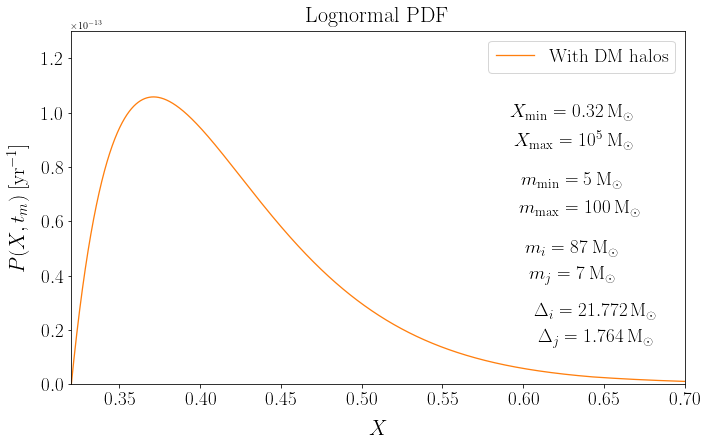

In [7]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.

X_min = 0.32
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 5 - 100 solar mass.


plt.figure(figsize = (11, 6.5))
file = np.load('tm_ofj0_Lgnmlhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


f_pbh_halo_Lognormal = 5.26e-4
f_halo_Lognormal  = 0.85 * f_pbh_halo_Lognormal  


        
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))



plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_Lognormal , DM_halos_presence = 'True'), 'C1')

#plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))


plt.text(0.63, 1e-13, "$X_\mathrm{min} = 0.32 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.631, 0.9e-13, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(0.63, 0.75e-13, "$m_\mathrm{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")
plt.text(0.635, 0.65e-13, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(0.63, 0.5e-13, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.63, 0.4e-13, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.645, 0.27e-13, "$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.645, 0.17e-13, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.xlim(0.32, 0.7)
plt.ylim(0, 1.3e-13)

    
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos"], prop = {'size':19}, facecolor = 'white', fontsize=130, loc='upper right')
plt.title('Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('1himLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

In [8]:
# Choosing the range of PBH mass function from m_min = 1e-3 M☉ - 100 M☉.
# Keeping all these values same.


m_1 = m_1_list[-1]            # in units of M☉

Δ_1 = Δ_1_list[-1]      # defined by choice

m_2 = m_2_list[0]             # in units of M☉
 
Δ_2 = Δ_2_list[0]   # defined by choice



m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

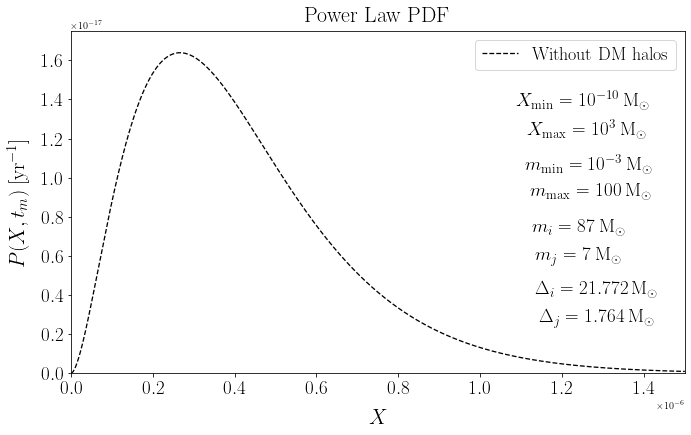

In [9]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

X_min = 1e-10
X_max = 1e3
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 1e-3 - 100 solar mass.


plt.figure(figsize = (11, 6.3))
file = np.load('tm_ofj0_PWRhalo_2.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


f_pbh_nohalo_PWR_2  = 1.18
f_nohalo_PWR_2 = 0.85 * f_pbh_nohalo_PWR_2
    
    
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3     #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    


plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_2,  DM_halos_presence = 'False'), 'k--')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))


plt.text(1.25e-6, 1.4e-17, "$X_\mathrm{min} = 10^{-10} \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(1.26e-6, 1.25e-17, "$X_\mathrm{max} = 10^{3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(1.265e-6, 1.07e-17, "$m_\mathrm{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")
plt.text(1.271e-6, 0.93e-17, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(1.24e-6, 0.75e-17, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(1.24e-6, 0.6e-17, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(1.285e-6, 0.43e-17, "$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(1.285e-6, 0.28e-17, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")



plt.xlim(0, 1.5e-6)
plt.ylim(0, 1.75e-17)
plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2imPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

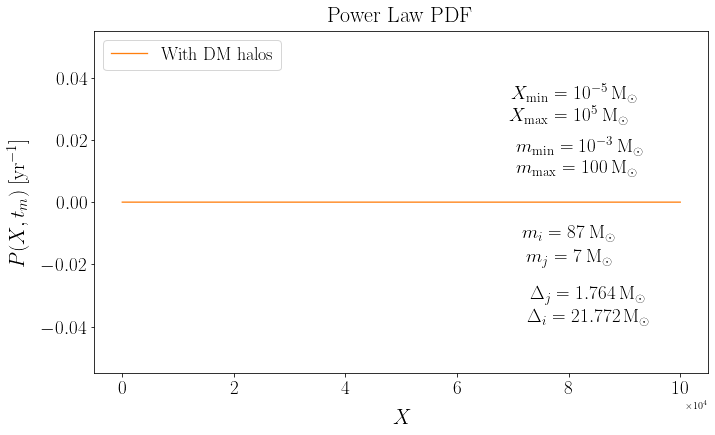

In [29]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

X_min = 1e-5
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 1e-3 - 100 solar mass.


plt.figure(figsize = (11, 6.3))
file = np.load('tm_ofj0_PWRhalo_2.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']



f_pbh_halo_PWR_2    =  1.18
f_halo_PWR_2   =  0.85 * f_pbh_halo_PWR_2       
    
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3     #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    


plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_PWR_2,  DM_halos_presence = 'True'), 'C1')

plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


plt.text(8.1e4, 0.035, "$X_\mathrm{min} = 10^{-5} \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(8e4, 0.028, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(8.2e4, 0.018, "$m_\mathrm{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")
plt.text(8.15e4, 0.011, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(8e4, -0.01, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(8e4, -0.018, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8.35e4, -0.037, "$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(8.345e4, -0.03, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

#plt.xlim(0, 3e-11)
#plt.ylim(0, 6.5e-13)
plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110, loc = 'upper left')
plt.title('Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2himPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

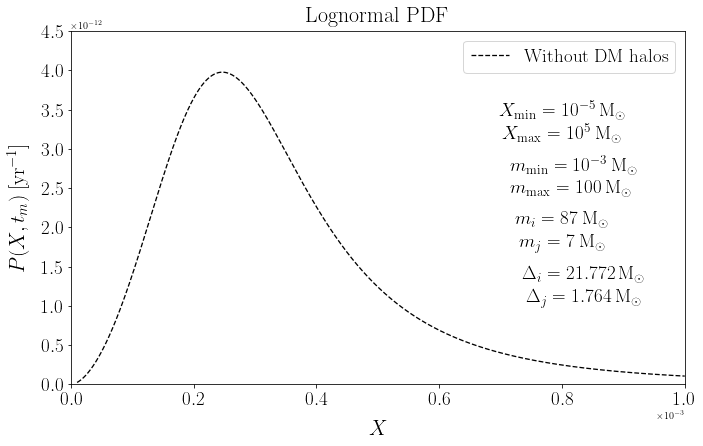

In [30]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

X_min = 1e-5
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 1e-3 - 100 solar mass.




plt.figure(figsize = (11, 6.5))




file_halo = np.load('tm_ofj0_Lgnmlhalo_2.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']

f_pbh_nohalo_Lognormal = 1.01e-3
f_nohalo_Lognormal  = 0.85 * f_pbh_nohalo_Lognormal 


def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))




plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_Lognormal,  DM_halos_presence = 'False'), 'k--' )

plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))


plt.text(0.8e-3, 3.5e-12, "$X_\mathrm{min} = 10^{-5} \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.8e-3, 3.2e-12, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(0.82e-3, 2.8e-12, "$m_\mathrm{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")
plt.text(0.815e-3, 2.5e-12, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(0.8e-3, 2.1e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.8e-3, 1.8e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.835e-3, 1.4e-12, "$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.835e-3, 1.1e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.xlim(0, 1e-3)
plt.ylim(0, 4.5e-12)   


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend([ "Without DM halos"], prop = {'size':19}, facecolor = 'white', fontsize=110, loc='upper right')
plt.title('Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('2imLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

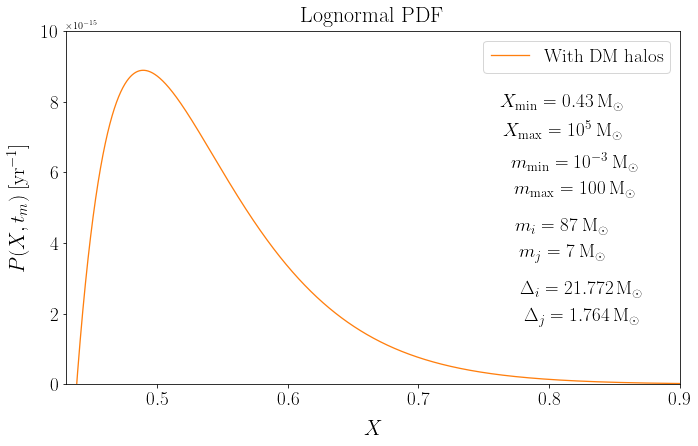

In [31]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

X_min = 0.43
X_max = 1e5
X = np.geomspace(X_min, X_max, 100000) # for the PBH mass range of 1e-3 - 100 solar mass.




plt.figure(figsize = (11, 6.5))
file_halo = np.load('tm_ofj0_Lgnmlhalo_2.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


f_pbh_halo_Lognormal = 7.20e-4
f_halo_Lognormal  = 0.85 * f_pbh_halo_Lognormal  


        
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_Lognormal , DM_halos_presence = 'True'), 'C1')



plt.text(0.81, 8e-15, "$X_\mathrm{min} = 0.43 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.81, 7.2e-15, "$X_\mathrm{max} = 10^{5} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(0.82, 6.3e-15, "$m_\mathrm{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")
plt.text(0.82, 5.52e-15, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(0.81, 4.49e-15, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.81, 3.7e-15, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.825, 2.7e-15, "$\Delta_{i} = 21.772 \: \mathrm{M_{\odot}}$", size = 19,
          ha="center", va="center")
plt.text(0.825, 1.89e-15, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")



plt.xlim(X_min, 0.9)
plt.ylim(0, 10e-15)   


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos"], prop = {'size':19}, facecolor = 'white', fontsize=110, loc='upper right')
plt.title('Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('2himLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 